In [0]:

#instalando biblioteca
!pip install bs4

     |████████████████████████████████| 128 kB 6.1 MB/s 
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=9522f6b84d4ae099ad5ea1ee7dc41c9efe20d059e535042333ba32fe6d8ef973
  Stored in directory: /root/.cache/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:

#importando bibliotecas
from urllib.request import urlopen, urlretrieve, Request
from urllib.error import URLError, HTTPError
from bs4 import BeautifulSoup
import pandas as pd

#Obtendo o html
url = "https://www.hltv.org/stats/players"
#url = "https://www.fundamentus.com.br/resultado.php"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36"}

req = Request(url, headers=headers)
response = urlopen(req)
html = response.read()
soup = BeautifulSoup(html,'html.parser')

#Obtendo as TAGs de interesse (topo das informações)
lista = soup.find('table')



In [0]:

#quantidades ações
qtd = soup.findAll('td', class_='playerCol')
qtd = range(int(len(qtd)-1))#retira o ultimo registro pra nao ter erro

#Declarando variaveis card
resumo = []

  

In [0]:

#pega as primeiras informações que nao entram no for

#Player = lista.find('td').find('a').getText()

Player = lista.find('td', class_='playerCol').getText()
Times = lista.find('td').findNext('td').contents[0]

#Mapas = lista.find('td', class_='statsDetail').findNext('td').contents[0]
#Mapas = lista.find('td', class_='statsDetail').getText()
#Rodadas = lista.find('td', class_='statsDetail gtSmartphone-only').getText()
#KdDiff = lista.find('td', class_='kdDiffCol won').getText()
#KD = lista.find('td', class_='statsDetail').getText()
#Desempenho = lista.find('td', class_='ratingCol').getText()
    
for i in qtd:
    
    acoes ={}
    
    Mapas = Times.findNext('td').contents[0]
    Rodadas = Mapas.findNext('td').contents[0]
    KdDiff = Rodadas.findNext('td').contents[0]
    KD = KdDiff.findNext('td').contents[0]
    Desempenho = KD.findNext('td').contents[0]
    
    acoes['id']= i
    acoes['Player'] = Player
    acoes['Times'] = Times
    acoes['Mapas'] = Mapas
    acoes['Rodadas'] = Rodadas
    acoes['KdDiff'] = KdDiff
    acoes['KD'] = KD
    acoes['Desempenho'] = Desempenho
    

    #Adiciona o dicionario de acoes em uma lista
    resumo.append(acoes)

    #try retorna o erro por a ultima linha nao encontrar span
    try: 
        Player = Desempenho.findNext('a').contents[0]
        Times=Player.findPrevious('td').findNext('td').contents[0]
        #Times = Player.findPrevious('td').contents[0]
    except HTTPError as e:
        print(e.status, e.reason) 
    

In [0]:

dataset = pd.DataFrame(resumo)

dataset.head(10000)

#Tratamento de dados campo Player


,id,Player,Times,Mapas,Rodadas,KdDiff,KD,Desempenho
0,0,ZywOo,[[]],1020,26803,+6164,1.37,1.27
1,1,s1mple,[[]],1571,41491,+9099,1.34,1.25
2,2,sh1ro,[[]],884,23451,+5599,1.45,1.23
3,3,deko,[[]],404,10913,+2341,1.37,1.21
4,4,saffee,[[]],404,10701,+1965,1.30,1.20
...,...,...,...,...,...,...,...,...
810,810,PASHANOJ,"[[], []]",608,15891,-2305,0.80,0.83
811,811,B1ad3,[[]],899,23232,-3408,0.80,0.83
812,812,netrick,[[]],455,11976,-1736,0.80,0.82
813,813,HUNDEN,[[]],1578,41153,-6238,0.78,0.81


In [0]:
#Tratamento dos dados.
convert_dict = {'Player': str}
dataset['Player'] = dataset['Player'].astype(convert_dict)

dataset['Times'] = dataset['Times'].str.replace('.', ',', regex=True)
convert_dict = {'Times': str}
dataset['Times'] = dataset['Times'].astype(convert_dict)

convert_dict = {'Mapas': int}
dataset['Mapas'] = dataset['Mapas'].astype(convert_dict)

convert_dict = {'Rodadas': int}
dataset['Rodadas'] = dataset['Rodadas'].astype(convert_dict)

convert_dict = {'KdDiff': int}
dataset['KdDiff'] = dataset['KdDiff'].astype(convert_dict)

#dataset['KD'] = dataset['KD'].str.replace('.', ',', regex=True)
#convert_dict = {'KD': float}
#dataset['KD'] = dataset['KD'].astype(convert_dict)

#dataset['Desempenho'] = dataset['Desempenho'].str.replace('.', ',', regex=True)
#convert_dict = {'Desempenho': float}
#dataset['Desempenho'] = dataset['Desempenho'].astype(convert_dict)



In [0]:

player1 = (dataset['Player'] == 'yuurih')
player2 =(dataset['Player'] == 'KSCERATO')
player3 =(dataset['Player'] == 'arT')
player4 =(dataset['Player'] == 'saffee')
player5 =(dataset['Player'] == 'drop')

furia = dataset[player1+player2+player3+player4+player5]

furia
                                                                                                                                        

/databricks/python/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


,id,Player,Times,Mapas,Rodadas,KdDiff,KD,Desempenho
4,4,saffee,nan,404,10701,1965,1.30,1.20
20,20,KSCERATO,nan,930,24208,3762,1.27,1.14
36,36,yuurih,nan,1022,26677,3154,1.19,1.12
441,441,arT,nan,1008,26196,32,1.00,1.00


In [0]:

#Gerando uma tabela em SQL com os dados
#Create Pandas Frame
pd_df = furia
#Convert into Spark Dataframe
spark_df = spark.createDataFrame(pd_df)
#Write Frame out as Table
spark_df.write.mode("overwrite").saveAsTable("tb_furia")

In [0]:
#configura visualização de dados em Python.
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(30,10))

plt.rc('font', family='serif', size=8)

area = plt.figure()

<Figure size 2160x720 with 0 Axes>

Out[10]: <Figure size 2160x720 with 0 Axes>

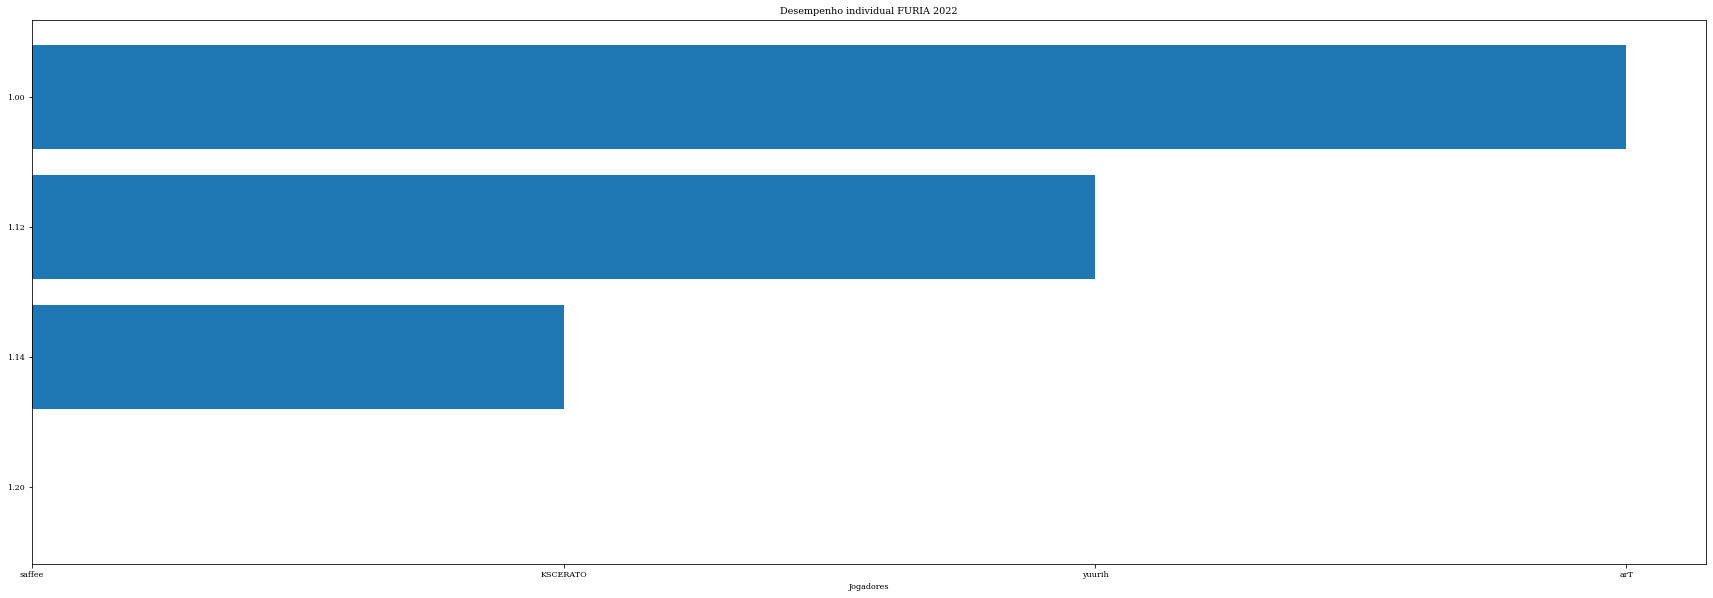

In [0]:
#Criando graficos em python.
#grafico = furia.sort_values(by='Desempenho', ascending = False)
#plt.barh(furia.Player, furia.Desempenho)
#plt.xlabel('Taxa de Desempenho')
#plt.title('Desempenho dos jogadores Furia 2022')

plt.barh(furia.Desempenho,furia.Player, align='center')
plt.yticks(furia.Desempenho)
plt.xlabel('Jogadores')
plt.title('Desempenho individual FURIA 2022')

area